<a href="https://colab.research.google.com/github/ProjectBWinter23/RecyclingIsFun/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install opendatasets

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling te

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/model

/content/gdrive/MyDrive/model


In [ ]:
%ls

assets/  fingerprint.pb  keras_metadata.pb  saved_model.pb  variables/


In [ ]:
# !unzip archive.zip

In [ ]:
import os
import keras


In [ ]:
base_path = "/content/gdrive/MyDrive/Garbage classification/"
#/content/garbage-classification/Garbage classification/Garbage classification

In [ ]:
categories = ['cardboard', 'glass', 'metal','paper','plastic','trash']

In [ ]:
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

In [ ]:
import re
filenames_list = []
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + category)

    filenames_list += filenames
    categories_list += [category] * len(filenames)

df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})
df = add_class_name_prefix(df, 'filename')

df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,filename,category
0,cardboard/cardboard351.jpg,cardboard
1,metal/metal187.jpg,metal
2,metal/metal58.jpg,metal
3,glass/glass328.jpg,glass
4,cardboard/cardboard210.jpg,cardboard


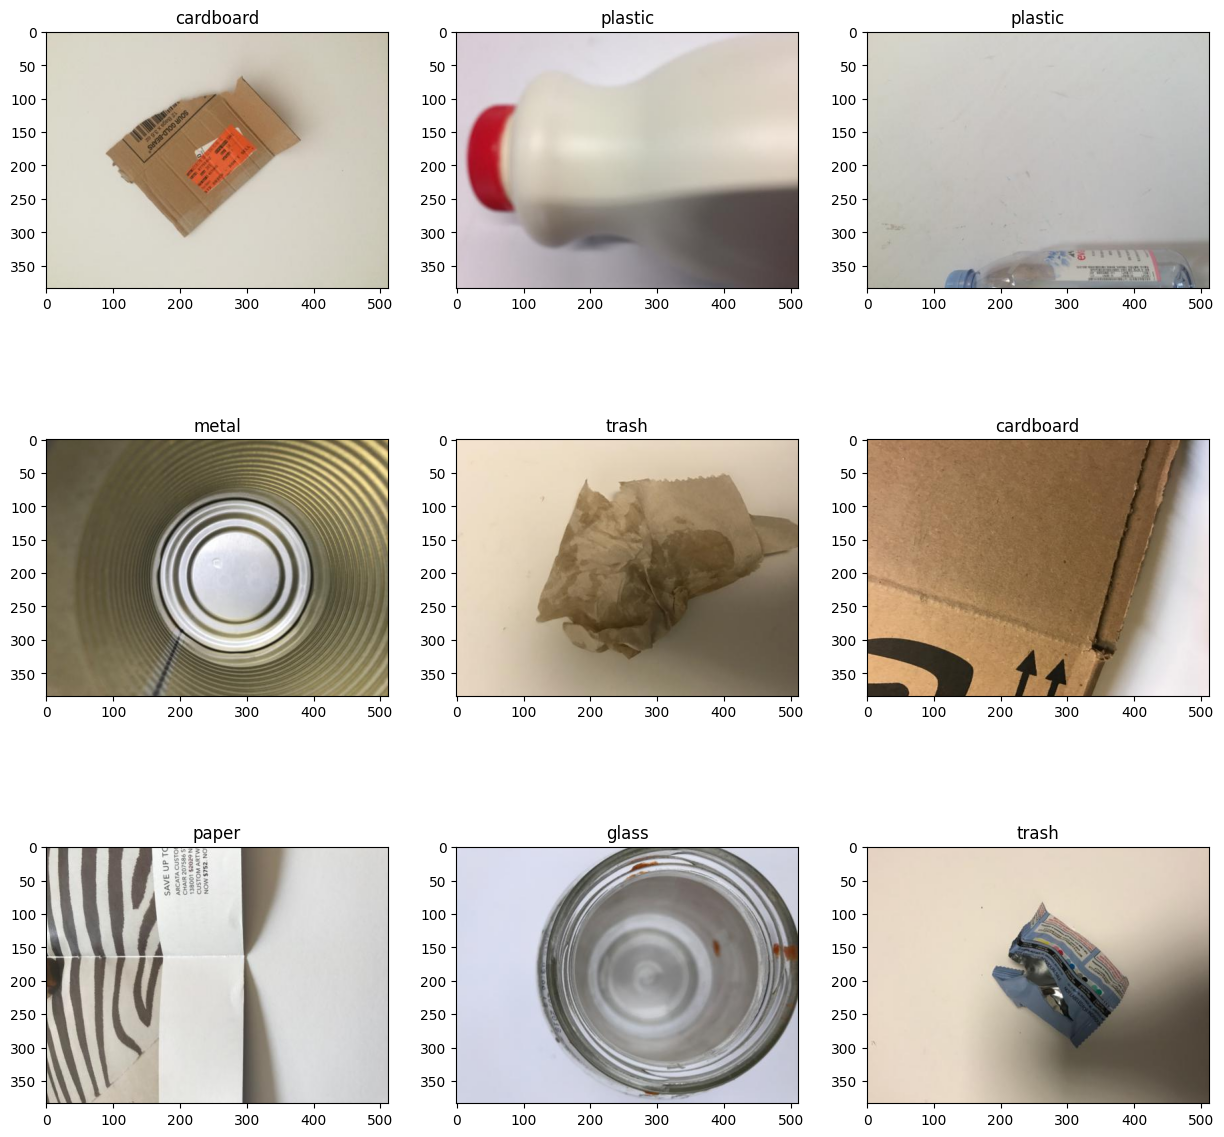

In [ ]:
import random
from keras.preprocessing import image
import keras.utils as image
plt.figure(figsize=(15,15))
for i in range(9):
    random_row = random.randint(0, len(df)-1)
    sample = df.iloc[random_row]
    random_image = image.load_img(base_path + sample['filename'])
    plt.subplot(330 + 1 + i)
    plt.title(sample['category'])
    plt.imshow(random_image)
plt.show()

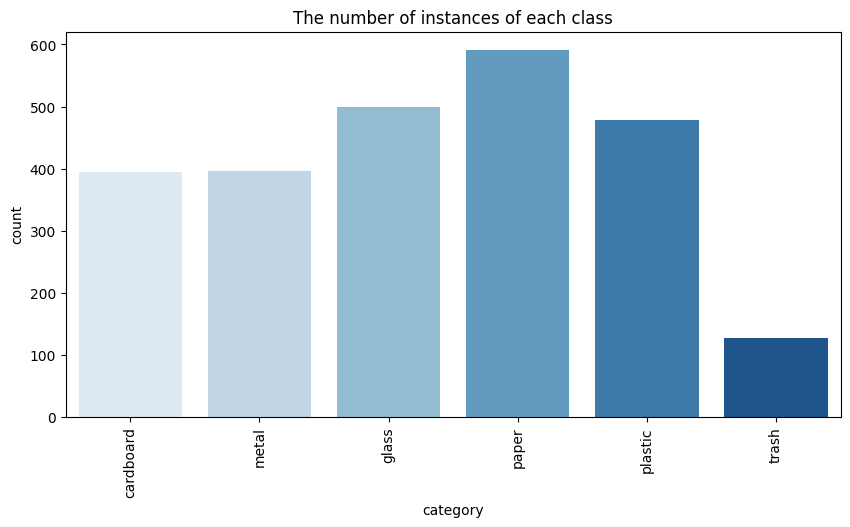

In [ ]:
#display the number of instances of each class/label
plt.figure(figsize=(10, 5))
sns.countplot(x="category", data=df, palette='Blues')
plt.xticks(rotation=90)
plt.title('The number of instances of each class')
plt.show()

In [ ]:
# #split dataset into train data set, valiadation data set and  test data set
# train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
# val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

# train_df = train_df.reset_index(drop=True)
# val_df = val_df.reset_index(drop=True)
# test_df = test_df.reset_index(drop=True)

# len(train_df), len(val_df), len(test_df)

In [ ]:
#define parameters for loaders: batch size, random seed, image size
im_shape = (256, 256)
batch_size = 128
seed = 42

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_path,
  labels= "inferred",
  label_mode = "categorical",
  class_names = ["cardboard" , "glass" , "metal" ,"paper" , "plastic", "trash"],
  validation_split=0.2,
  subset="training",
  seed = seed,
  image_size=(im_shape[0], im_shape[1]),
  batch_size=batch_size)

Found 2487 files belonging to 6 classes.
Using 1990 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_path,
  validation_split=0.1,
  subset="validation",
  labels= "inferred",
  label_mode = "categorical",
  class_names = ["cardboard" , "glass" , "metal" ,"paper" , "plastic", "trash"],
  seed=seed,
  image_size=(im_shape[0], im_shape[1]),
  batch_size=batch_size)

Found 2487 files belonging to 6 classes.
Using 248 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
# depth = 6
# label = class_names
# label

In [ ]:
# from sklearn import preprocessing
# lb = preprocessing.LabelBinarizer()
# lb.fit(label)
# lb.classes_


In [ ]:
# one_hot_label = lb.transform(label)

In [ ]:
# print (one_hot_label[5])

In [ ]:
#normalizer layer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
normalization_layer = layers.Rescaling(1./255)


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 256, 256, 3)
(128, 6)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#defining model
num_classes = len(categories)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(im_shape[0], im_shape[1], 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 262144)            0

In [ ]:
#train for model for 10 epochs
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 393s 17s/step - loss: 8.0279 - accuracy: 0.1854 - val_loss: 1.7561 - val_accuracy: 0.2782
Epoch 2/10
16/16 [==============================] - 252s 16s/step - loss: 1.6200 - accuracy: 0.3201 - val_loss: 1.5087 - val_accuracy: 0.3992
Epoch 3/10
16/16 [==============================] - 259s 16s/step - loss: 1.4071 - accuracy: 0.4563 - val_loss: 1.3437 - val_accuracy: 0.4556
Epoch 4/10
16/16 [==============================] - 251s 16s/step - loss: 1.2544 - accuracy: 0.5111 - val_loss: 1.2750 - val_accuracy: 0.5685
Epoch 5/10
16/16 [==============================] - 252s 16s/step - loss: 1.0653 - accuracy: 0.6000 - val_loss: 1.2355 - val_accuracy: 0.5726
Epoch 6/10
11/16 [===================>..........] - ETA: 1:15 - loss: 0.9737 - accuracy: 0.6456

In [ ]:
history.history

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(im_shape[0],
                                  im_shape[1],
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

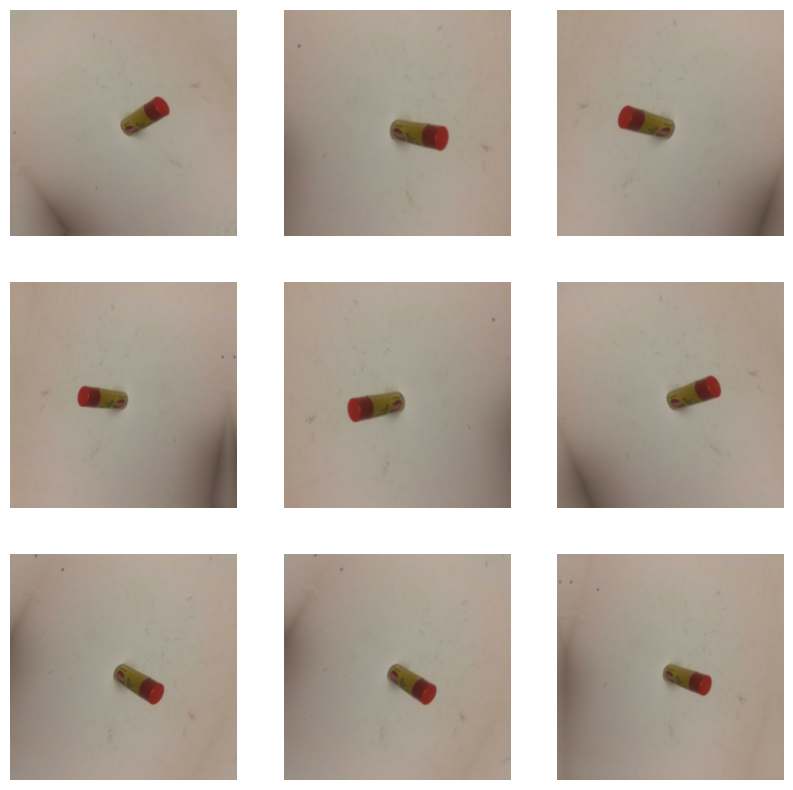

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # ...

# # Add data augmentation layer
# data_augmentation = ImageDataGenerator(
#     rotation_range=hp.Float("rotation_range", min_value=0.0, max_value=180.0),
#     width_shift_range=hp.Float("width_shift_range", min_value=0.0, max_value=0.2),
#     height_shift_range=hp.Float("height_shift_range", min_value=0.0, max_value=0.2),
#     shear_range=hp.Float("shear_range", min_value=0.0, max_value=0.2),
#     zoom_range=hp.Float("zoom_range", min_value=0.0, max_value=0.2),
#     horizontal_flip=hp.Boolean("horizontal_flip"),
#     vertical_flip=hp.Boolean("vertical_flip"),
# )



In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(im_shape[0], im_shape[1], 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation ='relu'),
  layers.Dense(6, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
16/16 [==============================] - 189s 12s/step - loss: 1.8667 - accuracy: 0.2275 - val_loss: 1.6983 - val_accuracy: 0.2262
Epoch 2/15
16/16 [==============================] - 182s 11s/step - loss: 1.6216 - accuracy: 0.2839 - val_loss: 1.5670 - val_accuracy: 0.3095
Epoch 3/15
16/16 [==============================] - 179s 11s/step - loss: 1.4422 - accuracy: 0.4055 - val_loss: 1.3319 - val_accuracy: 0.4405
Epoch 4/15
16/16 [==============================] - 189s 12s/step - loss: 1.3045 - accuracy: 0.4797 - val_loss: 1.2631 - val_accuracy: 0.4722
Epoch 5/15
16/16 [==============================] - 173s 11s/step - loss: 1.2580 - accuracy: 0.5099 - val_loss: 1.2303 - val_accuracy: 0.4762
Epoch 6/15
16/16 [==============================] - 173s 11s/step - loss: 1.1649 - accuracy: 0.5589 - val_loss: 1.1550 - val_accuracy: 0.5516
Epoch 7/15
16/16 [==============================] - 182s 12s/step - loss: 1.0949 - accuracy: 0.5910 - val_loss: 1.1264 - val_accuracy: 0.5873
Epoch 

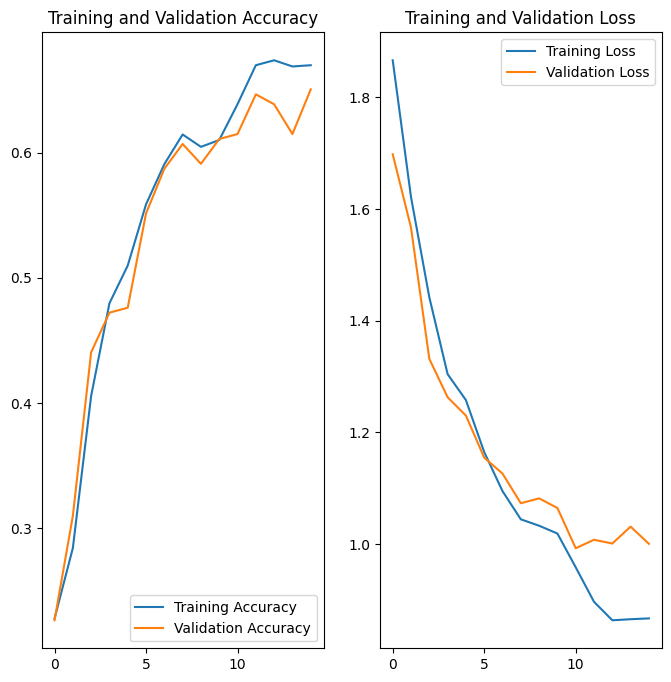

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history.history

{'loss': [1.8666656017303467,
  1.6215990781784058,
  1.4421851634979248,
  1.304512858390808,
  1.25796639919281,
  1.1649199724197388,
  1.0949352979660034,
  1.0444536209106445,
  1.0329874753952026,
  1.0189799070358276,
  0.9585187435150146,
  0.8967160582542419,
  0.8636244535446167,
  0.8655044436454773,
  0.8670146465301514],
 'accuracy': [0.22749753296375275,
  0.28387734293937683,
  0.40553906559944153,
  0.4797230362892151,
  0.5098912119865417,
  0.5588526129722595,
  0.5909990072250366,
  0.614737868309021,
  0.604846715927124,
  0.6102868318557739,
  0.6389713287353516,
  0.670128583908081,
  0.6740850806236267,
  0.6691394448280334,
  0.670128583908081],
 'val_loss': [1.6983466148376465,
  1.5670315027236938,
  1.3318920135498047,
  1.2631194591522217,
  1.2302703857421875,
  1.1549713611602783,
  1.126423716545105,
  1.07330322265625,
  1.0819690227508545,
  1.0647555589675903,
  0.9926522970199585,
  1.0078390836715698,
  1.0010782480239868,
  1.0313493013381958,
  1.0

In [ ]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/test1.jpg'
img = image.load_img(img_path, target_size=(im_shape[0], im_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)


In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 221ms/step
This image most likely belongs to metal with a 62.32 percent confidence.


In [ ]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/test2.jpg'
img = image.load_img(img_path, target_size=(im_shape[0], im_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 43ms/step
This image most likely belongs to plastic with a 98.90 percent confidence.


In [ ]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/test3.jpg'
img = image.load_img(img_path, target_size=(im_shape[0], im_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 44ms/step
This image most likely belongs to metal with a 87.40 percent confidence.


In [ ]:
img_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/test4.jpg'
img = image.load_img(img_path, target_size=(im_shape[0], im_shape[1]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 45ms/step
This image most likely belongs to plastic with a 99.16 percent confidence.


In [ ]:
# # compute class weight
# from sklearn.utils.class_weight import compute_class_weight
# y = partial_train_labels
# y = np.argmax(y, axis=1)
# class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y),y =  y)
# d_class_weights = dict(enumerate(class_weights))

In [ ]:
model.save('model2')

In [ ]:
model.save('model2.keras')

In [ ]:
import shutil
shutil.make_archive("/dataset/model2", 'zip', "/content/model2")

'/dataset/model2.zip'

In [ ]:
import os
print(os.getcwd())


/content/gdrive/MyDrive/Colab Notebooks/dataset


In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
class_names = df['category'].unique()
le = LabelEncoder()
encoder = le.fit(df['category'])
encoded_labels = le.transform(df['category'])
class_weights = compute_class_weight('balanced', classes=np.unique(encoded_labels), y= encoded_labels)

class_weight_dict = dict(zip(np.unique(encoded_labels), class_weights))


In [ ]:
df['category'].unique()

In [ ]:
for class_index, class_names in enumerate(class_names):
    print(f"Class Name: {class_names}, Encoded Label: {class_index}, Class Weight: {class_weight_dict[class_index]}")

In [ ]:
class_weight_dict

In [ ]:
# build model for keras tuner
def build_model(hp):
    model = keras.Sequential()
    data_augmentation
    model.add(tf.layers.Rescalling(1./255))
    model.add(tf.keras.layers.Input(shape=(im_shape[0],im_shape[1],3)))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 3,7)):
        model.add(
            layers.Conv2D(
                # Tune number of units separately.
                filters=hp.Int(f"units_{i}", min_value=16, max_value=256, step=16),
                kernel_size= 3, padding = "same",
                activation = hp.Choice("activation", ["relu","tanh"])
            )
        )
        model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())
    # if hp.Boolean("dropout"):
    #     model.add(layers.Dropout(rate=hp.Float(min=0.2, max = 0.5, step=0.1)))

    for i in range (hp.Int("num_dense_layers",3,7)):
      model.add(layers.Dense(
          units= hp.Int(f"units_dense_{i}", min_value = 32, max_value = 256, step = 16),
          activation = hp.Choice ("activation_dense", values=["relu","tanh"])
      ))
    model.add(layers.Dense(6, activation="softmax"))
    learning_rate = hp.Float("lr", min_value=3e-4, max_value=3e-2, sampling="log")
    optimizer = hp.Choice ("optimizer", values=["adam", "RMSprop"])

    if optimizer == "adam":
        optimizer_instance = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "RMSprop":
        optimizer_instance = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer choice")

        # Add early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
    )

    model.compile(
        optimizer= optimizer_instance,
        loss="categorical_crossentropy",
        metrics=["accuracy","Precision","Recall"],
    )
    return model

In [ ]:
from tensorflow.keras import layers

tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_loss", direction = "min"),
    max_epochs=5,
    # executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="My_cnn_tuning",
)

In [ ]:
tuner.search_space_summary()


In [ ]:
tuner.search(train_ds, epochs=2, validation_data=(val_ds),
             callbacks =[early_stopping],
            class_weight=class_weight_dict,)


In [ ]:
models = tuner.get_best_models(num_models=2)


In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials =1)[0]
# print(f"BEST num neurons for Dense Layer : {best_hp.get("units")}")
print(f"BEST learning_rate : {best_hp.get('lr')}")
print(f"BEST num layers : {best_hp.get('num_layers')}")

In [ ]:
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(5,))
best_model.summary()

In [ ]:
tuner.results_summary()
